## Introduction
Market Basket Analysis is a modelling technique based upon the theory that if you buy a certain group of items, you are more (or less) likely to buy another group of items.

### Problem
Perform Market Basket Analysis on the dataset (Market_Basket_Optimization). First prepare baskets and then apply MBA Hint: Each row is a transaction and there are no columns in raw dataset

## Data Acquisition

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
# for visualization 
from matplotlib import pyplot as plt
import seaborn as sns
# for Data Processing
from mlxtend.preprocessing import TransactionEncoder
# for marketbasket method
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Loading and understanding dataset

In [2]:
# load dataset
market = pd.read_csv("Market_Basket_Optimisation.csv")
# No. of column in dataset
print(market.columns)
# show starting 10 row from (0-9)
market.head(10)

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive Statistics

In [3]:
#Shape of Dataset
print(market.shape)
print()
# Information of Dataset
market.info()

(7500, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant 

### Data Cleaning 

In [4]:
# replacing empty value with 0.
market.fillna(0,inplace=True)

In [5]:
market.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


## Data Visualization

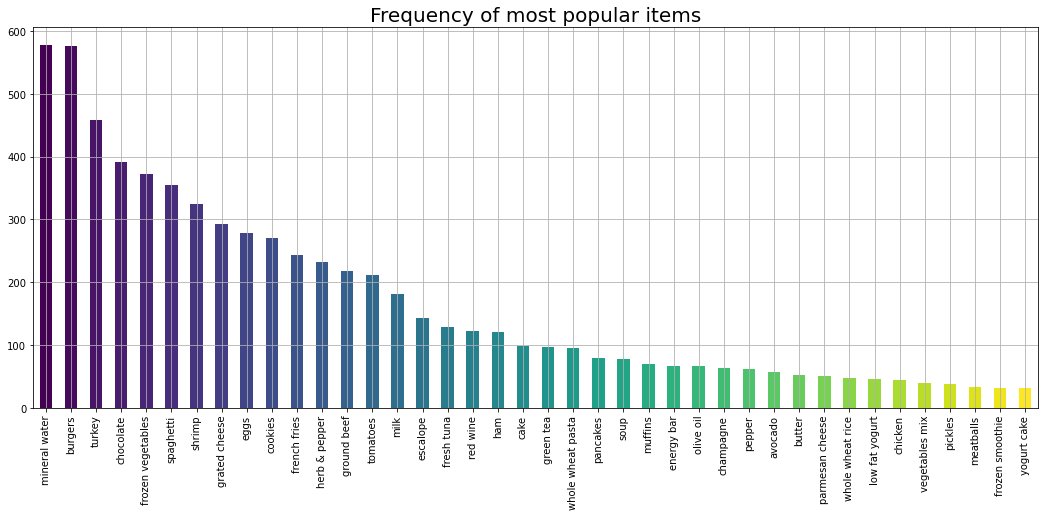

In [6]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.viridis(np.linspace(0, 1, 40))
market['shrimp'].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## Pre-Processing Data

In [7]:
transactions = []

for i in range(0,len(market)):
    transactions.append([str(market.values[i,j]) for j in range(0,20) if str(market.values[i,j])!='0'])

In [8]:
te = TransactionEncoder()
dataset = te.fit_transform(transactions)
dataset

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False,  True, False]])

In [9]:
market = pd.DataFrame(dataset, columns= te.columns_)
market.head()

,asparagus,0.0,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Using Apriori Algorithm

In [10]:
frequent_itemsets = apriori(market, min_support=0.003, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [11]:
frequent_itemsets.head(10)

,support,itemsets,length
0,1.000000,(0.0),1
1,0.020267,(almonds),1
2,0.008800,(antioxydant juice),1
3,0.004667,(asparagus),1
4,0.033200,(avocado),1
5,0.004533,(babies food),1
6,0.008667,(bacon),1
7,0.010800,(barbecue sauce),1
8,0.014267,(black tea),1
9,0.009200,(blueberries),1


In [12]:
frequent_itemsets[frequent_itemsets['length'] >= 3].head(10)

,support,itemsets,length
1016,0.005200,"(almonds, 0.0, burgers)",3
1017,0.003067,"(almonds, 0.0, cake)",3
1018,0.006000,"(almonds, 0.0, chocolate)",3
1019,0.006533,"(almonds, 0.0, eggs)",3
1020,0.004400,"(almonds, 0.0, french fries)",3
1021,0.003067,"(almonds, frozen vegetables, 0.0)",3
1022,0.004933,"(almonds, green tea, 0.0)",3
1023,0.003867,"(almonds, ground beef, 0.0)",3
1024,0.005200,"(almonds, 0.0, milk)",3
1025,0.007467,"(almonds, mineral water, 0.0)",3


In [13]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(0.0),0.020267,1.000000,0.020267,1.000000,1.0,0.0,inf
1,(0.0),(almonds),1.000000,0.020267,0.020267,0.020267,1.0,0.0,1.0
2,(antioxydant juice),(0.0),0.008800,1.000000,0.008800,1.000000,1.0,0.0,inf
3,(0.0),(antioxydant juice),1.000000,0.008800,0.008800,0.008800,1.0,0.0,1.0
4,(0.0),(asparagus),1.000000,0.004667,0.004667,0.004667,1.0,0.0,1.0
5,(asparagus),(0.0),0.004667,1.000000,0.004667,1.000000,1.0,0.0,inf
6,(avocado),(0.0),0.033200,1.000000,0.033200,1.000000,1.0,0.0,inf
7,(0.0),(avocado),1.000000,0.033200,0.033200,0.033200,1.0,0.0,1.0
8,(0.0),(babies food),1.000000,0.004533,0.004533,0.004533,1.0,0.0,1.0
9,(babies food),(0.0),0.004533,1.000000,0.004533,1.000000,1.0,0.0,inf


In [14]:
rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8762,"(mineral water, whole wheat pasta)",(olive oil),0.0096,0.065733,0.003867,0.402778,6.127451,0.003236,1.564353
15519,"(mineral water, 0.0, whole wheat pasta)",(olive oil),0.0096,0.065733,0.003867,0.402778,6.127451,0.003236,1.564353
15524,"(mineral water, whole wheat pasta)","(olive oil, 0.0)",0.0096,0.065733,0.003867,0.402778,6.127451,0.003236,1.564353


## Conclusion¶

More and more organizations are discovering ways of using market basket analysis to gain useful insights into associations and hidden relationships. As industry leaders continue to explore the technique’s value, a predictive version of market basket analysis is making in-roads across many sectors in an effort to identify sequential purchases.